<a href="https://colab.research.google.com/github/GesaXB/CnnSmokeClasification/blob/main/SmokeImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conect Gogle Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## PreProcessing Dataset

In [ ]:
data_train_path = '/content/drive/MyDrive/DataSetSmokeClassification/Training'
data_test_path = '/content/drive/MyDrive/DataSetSmokeClassification/Testing'
data_val_path = '/content/drive/MyDrive/DataSetSmokeClassification/Validation'

In [ ]:
img_width = 180
img_height = 180

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size = 32,
    validation_split = False
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    shuffle= False,
    batch_size = 32,
    validation_split = False
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle = False,
    batch_size = 32,
    validation_split = False
)

Found 716 files belonging to 2 classes.
Found 180 files belonging to 2 classes.
Found 176 files belonging to 2 classes.


In [ ]:
data_class = data_train.class_names

['NoSmoking', 'Smoking']

## Visualisasi Gambar

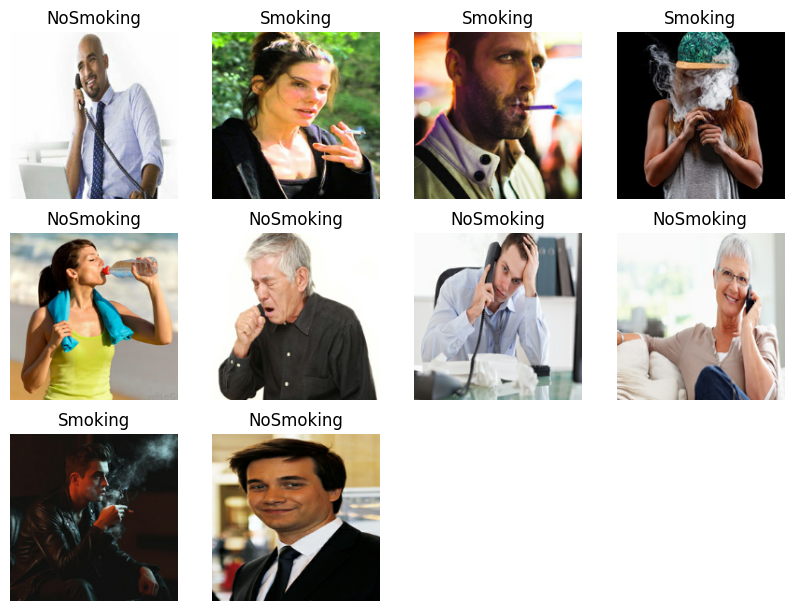

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(10):
    plt.subplot(4,4, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_class[labels[i]])
    plt.axis('off')

## Model

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_class))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
epochs_size = 15
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, verbose=1)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9848 - loss: 0.0460 - val_accuracy: 0.7500 - val_loss: 1.2900
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9891 - loss: 0.0247 - val_accuracy: 0.7500 - val_loss: 1.3912
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9986 - loss: 0.0077 - val_accuracy: 0.7222 - val_loss: 1.4459
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.7611 - val_loss: 1.4415
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.7556 - val_loss: 1.5719
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.7333 - val_loss: 1.5299
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9948 - loss: 0.0147 - val_accuracy: 0.7333 - val_loss: 1.6125
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9917 - loss: 0.0301 - val_accuracy: 0.7333 - val_loss:

## Acuracy

Text(0.5, 1.0, 'Accuracy')

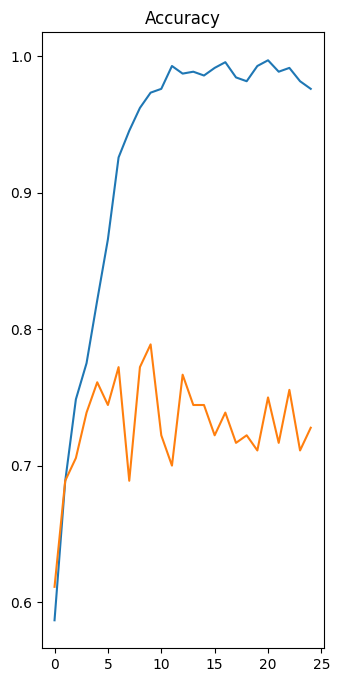

In [ ]:
# Accuracy
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'], label= 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy')


Text(0.5, 1.0, 'Loss')

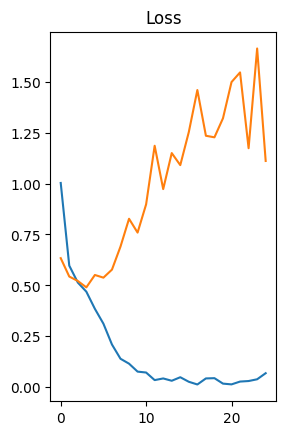

In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label= 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss')

## Predict

In [ ]:
gambar = '/content/notsmoking_0406.jpg'
gambar = tf.keras.utils.load_img(gambar, target_size=(img_width, img_height))
img_arr = tf.keras.utils.array_to_img(gambar)
img_bat = tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
score = tf.nn.softmax(predict)
print(score)

tf.Tensor([[9.9999619e-01 3.7575512e-06]], shape=(1, 2), dtype=float32)


In [ ]:
print('Smoking Detection in image is {} with accuracy of {:0.2f}'.format(
    data_class[np.argmax(score)], np.max(score) * 100
))

Smoking Detection in image is NoSmoking with accuracy of 100.00
